# Process mesurements

In [1]:
import pandas as pd
from h5py import File
import numpy as np


import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

In [2]:
h5 = File('cu_inj_yag02_solscan.h5', 'r')['YAG02']

In [3]:
INFO = dict(h5.attrs)
INFO

{'information': 'Solenoid scan last about 5 minutes, the timestamp is associated with the end of the scan.',
 'isotime': '2020-06-21T09:17:33.414252-07:00'}

# Fixed PVs

In [4]:
PVDATA = dict(h5['pvdata'].attrs)
PVDATA

{'ACCL:IN20:300:L0A_PDES': array(['0.0', ''], dtype=object),
 'ACCL:IN20:400:L0B_PDES': array(['-2.5', ''], dtype=object),
 'IRIS:LR20:130:MOTR_ANGLE': array(['220.1999969482422', 'degree'], dtype=object),
 'QUAD:IN20:121:BDES': array(['0.0025', 'kG'], dtype=object),
 'QUAD:IN20:122:BDES': array(['0.0', 'kG'], dtype=object),
 'SOLN:IN20:121:BDES': array(['0.449', 'kG-m'], dtype=object)}

# Mapping table

In [5]:
DAT = pd.read_csv('../../pv_mapping/cu_inj_impact.csv')#.dropna()
MAP = DAT.set_index('device_pv_name')
MAP

,Variable,bmad_name,device_min,device_max,scan_min,scan_max,default_value,pv_unit,impact_name,impact_factor,impact_description,impact_unit,impact_default
device_pv_name,,,,,,,,,,,,,
IRIS:LR20:130:CONFG_SEL,Iris diameter ENUM,NaN,0.300,1.800,0.800,1.200,NaN,mm,distgen:r_dist:sigma_xy:value,0.333333,Gaussian is cut off at 1.5 sigma_xu,mm,0.4
SOLN:IN20:121:BDES,Solenoid,SOL1,0.000,0.550,0.350,0.500,NaN,kG*m,SOL1:solenoid_field_scale,0.514272,peak field,T,NaN
QUAD:IN20:121:BDES,Corrector quad,CQ01,-0.015,0.015,-0.015,0.015,NaN,kG,CQ01:b1_gradient,-0.476190,Corrector quad gradient,T/m,NaN
QUAD:IN20:122:BDES,Skew quad,SQ01,-0.015,0.015,-0.015,0.015,NaN,kG,SQ01:b1_gradient,-0.476190,Skew quad gradient,T/m,NaN
ACCL:IN20:300:L0A_PDES,L0A phase,L0A,-20.000,0.000,-20.000,0.000,NaN,deg,L0A_phase:dtheta0_deg,1.000000,Phase relative to on-crest,deg,NaN
ACCL:IN20:400:L0B_PDES,L0B phase,L0B,-20.000,0.000,-20.000,0.000,NaN,deg,L0B_phase:dtheta0_deg,1.000000,Phase relative to on-crest,deg,NaN
ACCL:IN20:300:L0A_ADES,L0B voltage,L0A,0.000,110.000,50.000,66.000,NaN,MV,L0A_scale:voltage,1000000.000000,Voltage,V,NaN
ACCL:IN20:400:L0B_ADES,L0B voltage,L0B,0.000,110.000,70.000,70.000,NaN,MV,L0B_scale:voltage,1000000.000000,Voltage,V,NaN
QUAD:IN20:361:BDES,QA01,QA01,-20.000,20.000,-3.500,-2.750,NaN,kG,QA01:b1_gradient,-0.925926,10.8 cm quad,T/m,NaN


In [6]:
'IRIS:LR20:130:MOTR_ANGLE' in MAP.index

False

In [7]:
def impact_inputs(pv_data):
    """
    Get impact inputs from pv data
    
    """
    d = {}
    for pv, val in pv_data.items():
        #if pv not in MAP.index:
        #    print('missing: ', pv)
        #    continue
            
        if pv == 'IRIS:LR20:130:MOTR_ANGLE':
            print('IRIS angle calc TODO')
            continue
        
        row=MAP.loc[pv]
        name = row['impact_name']
        factor = float(row['impact_factor'])
        print(pv, name,  factor, float(val[0]))
        d[ name ] = factor*float(val[0])
    return d
        
impact_inputs(PVDATA)        


ACCL:IN20:300:L0A_PDES L0A_phase:dtheta0_deg 1.0 0.0
ACCL:IN20:400:L0B_PDES L0B_phase:dtheta0_deg 1.0 -2.5
IRIS angle calc TODO
QUAD:IN20:121:BDES CQ01:b1_gradient -0.47619047600000003 0.0025
QUAD:IN20:122:BDES SQ01:b1_gradient -0.47619047600000003 0.0
SOLN:IN20:121:BDES SOL1:solenoid_field_scale 0.51427242 0.449


{'L0A_phase:dtheta0_deg': 0.0,
 'L0B_phase:dtheta0_deg': -2.5,
 'CQ01:b1_gradient': -0.00119047619,
 'SQ01:b1_gradient': -0.0,
 'SOL1:solenoid_field_scale': 0.23090831658}

In [8]:
'IRIS:LR20:130:MOTR_ANGLE' not in MAP.index

True

# Beam Data

In [9]:
list(h5['beam_data'])

['SOLN:IN20:121:BCTRL',
 'Step0',
 'Step1',
 'Step10',
 'Step11',
 'Step12',
 'Step13',
 'Step14',
 'Step2',
 'Step3',
 'Step4',
 'Step5',
 'Step6',
 'Step7',
 'Step8',
 'Step9']

In [10]:
SOLVAL_OF_STEP = {}
VARPVNAME='SOLN:IN20:121:BCTRL'
for i, val in enumerate(h5['beam_data'][VARPVNAME][:]):
    name = f'Step{i}'
    SOLVAL_OF_STEP[name] = val
SOLVAL_OF_STEP 

{'Step0': 0.449,
 'Step1': 0.45271428571428574,
 'Step2': 0.45642857142857146,
 'Step3': 0.46014285714285713,
 'Step4': 0.46385714285714286,
 'Step5': 0.4675714285714286,
 'Step6': 0.4712857142857143,
 'Step7': 0.475,
 'Step8': 0.4787142857142857,
 'Step9': 0.48242857142857143,
 'Step10': 0.48614285714285715,
 'Step11': 0.4898571428571429,
 'Step12': 0.49357142857142855,
 'Step13': 0.4972857142857143,
 'Step14': 0.501}

# Process outputs

In [11]:
list(h5['beam_data']['Step1']['beam_sizes_x'])

['Asymmetric',
 'Gaussian',
 'RMS',
 'RMS cut area',
 'RMS cut peak',
 'RMS floor',
 'Super']

In [12]:
def get_beam_size(g, suffix=''):
    d = {}
    for g2 in g:
        k = '_'.join(g2.split())
        d[k+suffix] = g[g2][:].mean() * 1e-6
        d['error_'+k+suffix] = g[g2][:].std() * 1e-6
    return d
get_beam_size(h5['beam_data']['Step1']['beam_sizes_x'])

{'Asymmetric': 0.000739140778431088,
 'error_Asymmetric': 6.9219165459071544e-06,
 'Gaussian': 0.0007364601020778789,
 'error_Gaussian': 6.926248472644993e-06,
 'RMS': 0.0008330645568630414,
 'error_RMS': 8.184780523269786e-06,
 'RMS_cut_area': 0.00066724359690922,
 'error_RMS_cut_area': 5.9695755469707036e-06,
 'RMS_cut_peak': 0.0006770563507347549,
 'error_RMS_cut_peak': 6.150898166159281e-06,
 'RMS_floor': 0.0008184494709508986,
 'error_RMS_floor': 7.94456872626811e-06,
 'Super': 0.0007297535427662203,
 'error_Super': 6.874773173395269e-06}

In [13]:
def process_step(g):
    d = get_beam_size(g['beam_sizes_x'], '_x')
    d.update(get_beam_size(g['beam_sizes_y'], '_y'))
    return d
process_step(h5['beam_data']['Step1'])


{'Asymmetric_x': 0.000739140778431088,
 'error_Asymmetric_x': 6.9219165459071544e-06,
 'Gaussian_x': 0.0007364601020778789,
 'error_Gaussian_x': 6.926248472644993e-06,
 'RMS_x': 0.0008330645568630414,
 'error_RMS_x': 8.184780523269786e-06,
 'RMS_cut_area_x': 0.00066724359690922,
 'error_RMS_cut_area_x': 5.9695755469707036e-06,
 'RMS_cut_peak_x': 0.0006770563507347549,
 'error_RMS_cut_peak_x': 6.150898166159281e-06,
 'RMS_floor_x': 0.0008184494709508986,
 'error_RMS_floor_x': 7.94456872626811e-06,
 'Super_x': 0.0007297535427662203,
 'error_Super_x': 6.874773173395269e-06,
 'Asymmetric_y': 0.0008317858244666806,
 'error_Asymmetric_y': 5.503499757492046e-06,
 'Gaussian_y': 0.0008255950180689637,
 'error_Gaussian_y': 5.843414565487934e-06,
 'RMS_y': 0.0008806661633773212,
 'error_RMS_y': 6.5311667067877664e-06,
 'RMS_cut_area_y': 0.0007139674291460533,
 'error_RMS_cut_area_y': 4.7911745921310116e-06,
 'RMS_cut_peak_y': 0.0007200163416184544,
 'error_RMS_cut_peak_y': 4.483451650843647e-06,


In [14]:
PVDATA

{'ACCL:IN20:300:L0A_PDES': array(['0.0', ''], dtype=object),
 'ACCL:IN20:400:L0B_PDES': array(['-2.5', ''], dtype=object),
 'IRIS:LR20:130:MOTR_ANGLE': array(['220.1999969482422', 'degree'], dtype=object),
 'QUAD:IN20:121:BDES': array(['0.0025', 'kG'], dtype=object),
 'QUAD:IN20:122:BDES': array(['0.0', 'kG'], dtype=object),
 'SOLN:IN20:121:BDES': array(['0.449', 'kG-m'], dtype=object)}

In [15]:
def process_beam_data(g):
    
    dat = []
    for g2 in g:
        if not g2.startswith('Step'):
            continue
        step = g[g2]
        solval = SOLVAL_OF_STEP[g2]
        impactname =  MAP.loc['SOLN:IN20:121:BDES']['impact_name']
        impactval = MAP.loc['SOLN:IN20:121:BDES']['impact_factor']*solval
        
        d = process_step(step)
        d[VARPVNAME] = solval
        d[impactname] = impactval
        dat.append(d)
    return(dat)

YDAT = pd.DataFrame(process_beam_data(h5['beam_data'])).sort_values(VARPVNAME)
YDAT.set_index(VARPVNAME)

,Asymmetric_x,error_Asymmetric_x,Gaussian_x,error_Gaussian_x,RMS_x,error_RMS_x,RMS_cut_area_x,error_RMS_cut_area_x,RMS_cut_peak_x,error_RMS_cut_peak_x,...,error_RMS_y,RMS_cut_area_y,error_RMS_cut_area_y,RMS_cut_peak_y,error_RMS_cut_peak_y,RMS_floor_y,error_RMS_floor_y,Super_y,error_Super_y,SOL1:solenoid_field_scale
SOLN:IN20:121:BCTRL,,,,,,,,,,,,,,,,,,,,,
0.449000,0.000854,0.000006,0.000851,0.000007,0.000977,0.000006,0.000781,0.000005,0.000789,0.000005,...,0.000008,0.000828,0.000007,0.000830,0.000007,0.000995,0.000008,0.000884,0.000007,0.230908
0.452714,0.000739,0.000007,0.000736,0.000007,0.000833,0.000008,0.000667,0.000006,0.000677,0.000006,...,0.000007,0.000714,0.000005,0.000720,0.000004,0.000866,0.000007,0.000765,0.000005,0.232818
0.456429,0.000619,0.000012,0.000614,0.000011,0.000686,0.000012,0.000551,0.000010,0.000561,0.000010,...,0.000009,0.000598,0.000007,0.000607,0.000007,0.000729,0.000009,0.000641,0.000007,0.234729
0.460143,0.000524,0.000004,0.000518,0.000004,0.000569,0.000005,0.000458,0.000004,0.000467,0.000004,...,0.000005,0.000503,0.000004,0.000513,0.000004,0.000611,0.000005,0.000537,0.000004,0.236639
0.463857,0.000418,0.000002,0.000410,0.000002,0.000443,0.000002,0.000355,0.000002,0.000362,0.000001,...,0.000004,0.000394,0.000003,0.000405,0.000003,0.000479,0.000004,0.000419,0.000004,0.238549
0.467571,0.000340,0.000003,0.000331,0.000003,0.000356,0.000003,0.000281,0.000002,0.000283,0.000002,...,0.000005,0.000323,0.000004,0.000332,0.000004,0.000397,0.000005,0.000340,0.000005,0.240459
0.471286,0.000248,0.000004,0.000245,0.000004,0.000292,0.000003,0.000227,0.000002,0.000228,0.000002,...,0.000004,0.000269,0.000003,0.000274,0.000003,0.000339,0.000004,0.000271,0.000002,0.242369
0.475000,0.000223,0.000005,0.000223,0.000005,0.000295,0.000003,0.000234,0.000003,0.000245,0.000002,...,0.000003,0.000248,0.000003,0.000252,0.000002,0.000316,0.000003,0.000241,0.000004,0.244279
0.478714,0.000259,0.000005,0.000259,0.000005,0.000355,0.000005,0.000284,0.000005,0.000302,0.000005,...,0.000003,0.000256,0.000003,0.000262,0.000003,0.000326,0.000003,0.000238,0.000004,0.246190


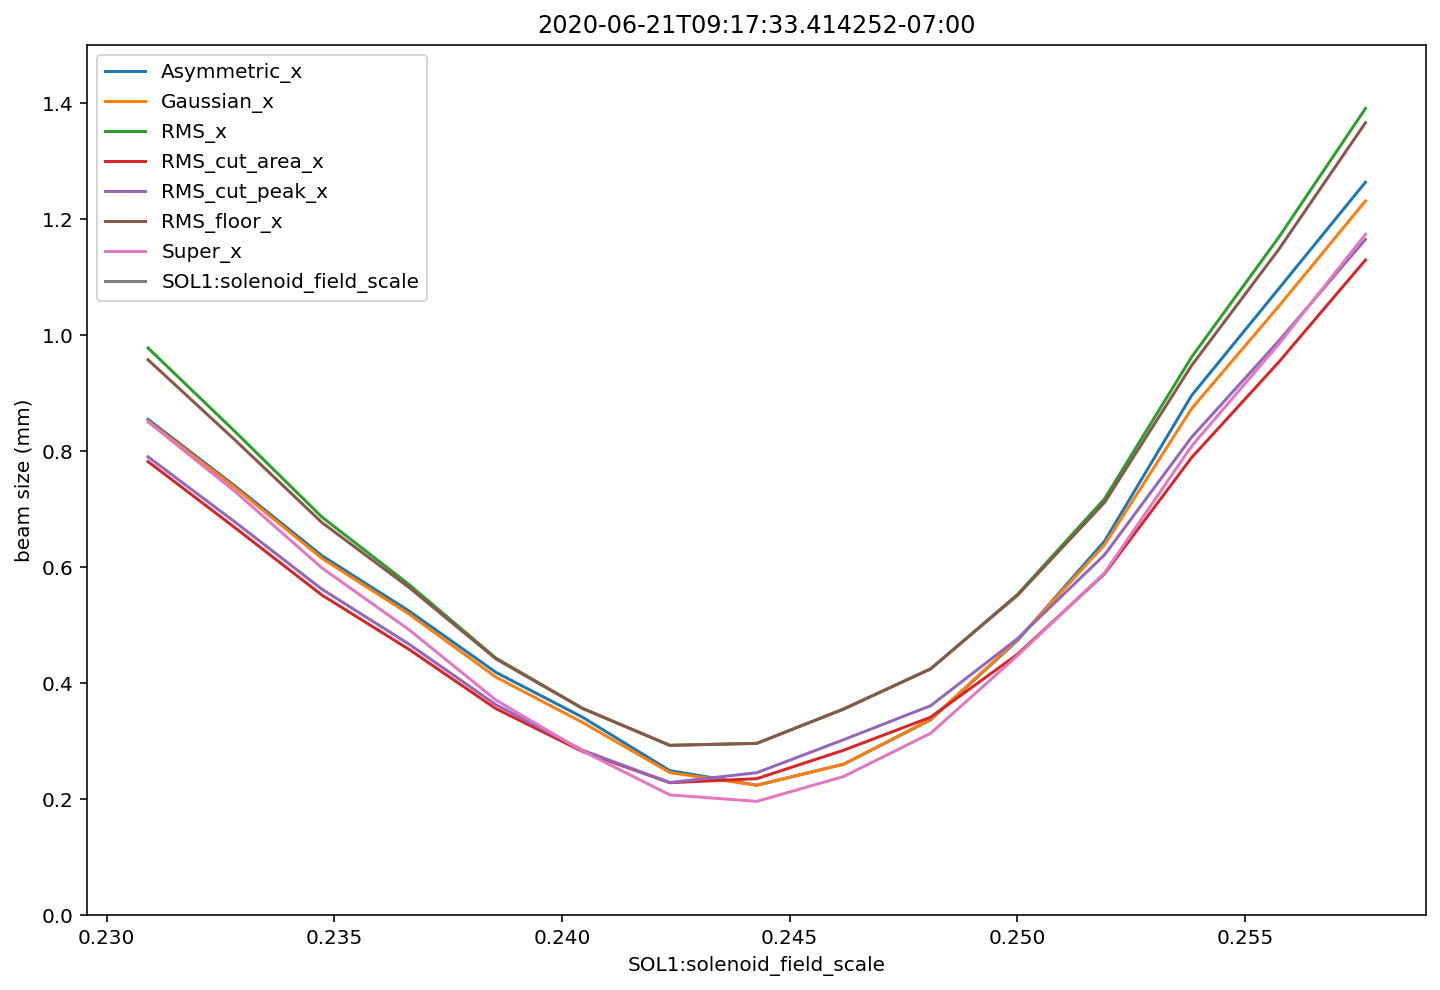

In [16]:
plt.xlabel('SOL1:solenoid_field_scale')
plt.ylabel('beam size (mm)')
plt.title(INFO['isotime'])
plt.ylim(0, 1.5)
for k in YDAT:
    if k == VARPVNAME:
        continue
    if k.endswith('_y') or k.startswith('error_'):
        continue
        
    X = YDAT['SOL1:solenoid_field_scale']    
    Y = YDAT[k]

    
    plt.plot(X, Y*1e3, label=k)
    
    
plt.legend()